# HW01 点评 

我看了一些同学的作业，发现了一些问题，总结如下：

- Python 环境配置问题
- 文档的第一个 code cell，用于加载必要的库，设定路径等
- Markdown 语法问题
  - `##` 开头的文字是标题，通常字号都会很大
  - 标题格式：用 `## 1. xxx`，不要写成 `##1. xxx` 或 `## 1.xxx`
- 代码中文显示问题
- 小数点后有效数字问题
- 表格美观度
  - `Win+R` >> `cmd` >> `pip install tabulate` 
- 图形尺寸问题：图形中的字号与正文中字号相当，或略小于正文字号

## Python 环境配置问题

我在讲义中提供了 Anaconda 的安装方法，大家可以参考。

- [6  Python：安装和环境配置](https://book.lianxh.cn/ds/body/01_1_install-Python-Anocanda.html)
- [7  Python 安装常见问题](https://book.lianxh.cn/ds/body/01_2_install_FAQs.html)

再分享几个我遇到过的问题，供大家参考（部分由 Lizzie 提供，Copilot 补充）：

1. **在 mac 上安装 Anaconda 时遇到 `Permission denied` 问题**：可以在终端输入 `sudo chmod -R 777 /opt/anaconda3`，然后重新运行安装程序。  
    **操作方法**：打开“终端” (快捷键 `Ctrl + ~`)，输入上述命令并回车，输入电脑密码后即可更改权限，然后重新运行 Anaconda 安装包。

2. **Anaconda 的 silicon 和 intel 版本选择**：silicon 适用于 2020 年以后苹果芯片（M1/M2），intel 适用于老款 Intel 芯片，安装时注意区分。  
    **操作方法**：在苹果电脑左上角点击“” > “关于本机”查看芯片类型，然后到 Anaconda 官网选择对应版本下载安装。

3. **Anaconda Navigator 无法打开**：可在终端输入 `conda --version` 或 `conda list` 检查 conda 是否安装成功。如果命令可用，说明安装没问题，可以直接用终端管理环境和包。若需要图形界面，尝试更新或重装 Navigator。  
    **操作方法**：在终端输入 `conda update anaconda-navigator` 更新，或用 `conda install anaconda-navigator` 重新安装。

4. **matplotlib 字体设置问题**：如果用 `SimHei` 报 fontfamily 错误，说明系统缺少该字体。可尝试换成其他中文字体，或在系统中安装黑体。  
    **操作方法**：在代码中尝试 `plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']` 或 `['Arial Unicode MS']`，如仍报错，可在网上搜索对应字体下载安装。

5. **Copilot 国内访问慢的替代方案**：如果 Copilot 访问速度慢，可以尝试使用豆包等国内 AI 工具，代码生成效果也不错。  
    **操作方法**：搜索“豆包 AI”或其他国内 AI 编程助手，注册并使用即可。

6. **Jupyter Notebook 中文显示乱码**：建议在代码块中设置合适的字体（如 `SimHei`），并确保系统已安装对应字体，避免中文乱码。  
    **操作方法**：在代码块加入 `plt.rcParams['font.sans-serif'] = ['SimHei']`，如无效则安装黑体字体或更换为系统已有的中文字体。

7. **包安装失败或网络问题**：遇到 pip 或 conda 安装包失败时，可以尝试更换国内镜像源（如清华、中科大等），提升下载速度和成功率。  
    **操作方法**：  
    - pip：`pip install 包名 -i https://pypi.tuna.tsinghua.edu.cn/simple`  
    - conda：`conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free/` 并设置为默认。

## 第一个代码块：统一做基本设定

好处是不用在后面重复多次设定，维护也相对直观。

In [ ]:
# 基本设定

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

## 有效数字位数

- 通常保留两位或三位有效数字即可
- 如果数字本身很小，可以放大 100 倍或 1000 倍
  - 例如：`0.00123` 可以写成 `0.123%` 或 `1.23e-3`

In [ ]:
# 设置随机种子
np.random.seed(888)

# 参数
N = 500
mean = [0, 3]
std = [1, 1.5]
corr = 0.4

# 协方差矩阵
cov = [[std[0]**2, corr*std[0]*std[1]],
       [corr*std[0]*std[1], std[1]**2]]

# 生成数据
data = np.random.multivariate_normal(mean, cov, N)

# 存入数据框
df = pd.DataFrame(data, columns=['x1', 'x2'])

# 查看前几行
print(df.head().round(2))    # 显示两位小数
print('-' * 20)
print(df.head().T.round(2))  # 转置

     x1    x2
0  0.05  2.68
1  0.46  4.22
2 -0.47  2.08
3  0.60  3.13
4 -0.83  3.50
--------------------
       0     1     2     3     4
x1  0.05  0.46 -0.47  0.60 -0.83
x2  2.68  4.22  2.08  3.13  3.50


In [ ]:
# 均值、标准差、中位数、最大值、最小值
desc = df.describe().T
desc['median'] = df.median()
desc['skew'] = df.skew()
desc['kurtosis'] = df.kurt()

# 单行代码不要太宽，不便于阅读
print(desc[['mean', 'std', 'median', 
            'min', 'max', 'skew', 'kurtosis']].round(2))

    mean   std  median   min   max  skew  kurtosis
x1  0.00  0.97    0.02 -2.81  2.58 -0.02     -0.11
x2  3.09  1.48    3.13 -1.42  7.61  0.02      0.11


## 图片尺寸

如果图片尺寸太大，一方面会占用了过多的空间，另一方面也会显得不精致。

建议：图形中的字号与正文中字号相当，或略小于正文字号。

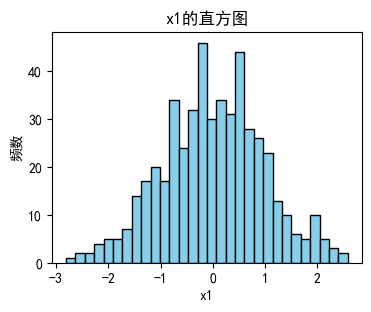

In [ ]:
plt.figure(figsize=(4, 3))  # 设置图形大小
plt.hist(df['x1'], bins=30, color='skyblue', edgecolor='k')
plt.title('x1的直方图')
plt.xlabel('x1')
plt.ylabel('频数')
plt.show()